# K-Mean Clustering [Unsupervise ]

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
sf=pd.read_csv('C:\\Users\\hamza jamil\\Downloads\\Documents\\py-master\\ML\\13_kmeans\\income.csv')
sf.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'income')

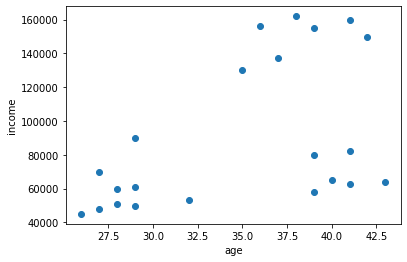

In [3]:
plt.scatter(sf['Age'],sf['Income($)'])
plt.xlabel('age')
plt.ylabel("income")

In [4]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(sf[['Age','Income($)']])
yp

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [5]:
sf['cluster']=yp
sf.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

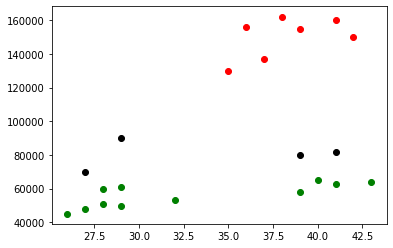

In [10]:
c1=sf[sf.cluster==0]
c2=sf[sf.cluster==1]
c3=sf[sf.cluster==2]
plt.scatter(c1.Age,c1['Income($)'],color='green')
plt.scatter(c2.Age,c2['Income($)'],color='red')
plt.scatter(c3.Age,c3['Income($)'],color='black')


In [11]:
#here we used scaler method to make a perfict cluster
mi=MinMaxScaler()
mi=MinMaxScaler()
mi.fit(sf[['Income($)']])
sf['Income($)']=mi.transform(sf[['Income($)']])


mi.fit(sf[['Age']])
sf['Age']=mi.transform(sf[['Age']])
sf.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [12]:
km=KMeans(n_clusters=3)
yp=km.fit_predict(sf[['Age','Income($)']])
yp

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
a=km.cluster_centers_
a

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [14]:
sf['cluster']=yp
sf.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


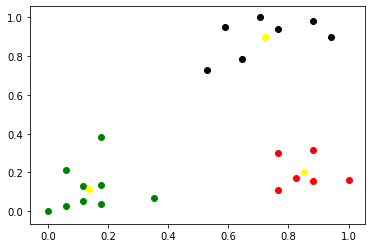

In [15]:
c1=sf[sf.cluster==0]
c2=sf[sf.cluster==1]
c3=sf[sf.cluster==2]
plt.scatter(c1.Age,c1['Income($)'],color='green')
plt.scatter(c2.Age,c2['Income($)'],color='red')
plt.scatter(c3.Age,c3['Income($)'],color='black')
plt.scatter(a[:,0],a[:,1],color='yellow',label='center')

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(sf[['Age','Income($)']])
    sse.append(km.inertia_)

In [19]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22443334487241418,
 0.16858512236029757,
 0.13265419827245162,
 0.10907864282306066]

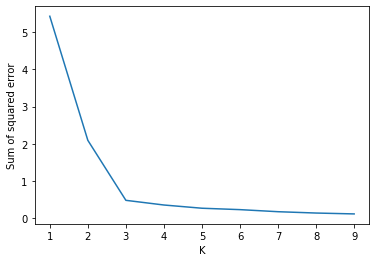

In [20]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)